<a href="https://colab.research.google.com/github/sazio/Transients/blob/master/Python/Winner_Takes_All.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from tqdm.notebook import tqdm 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [26]:
def nakaRushton(x, M = 1, sigma = 1):
  if x >= 0:
    return (M*x*x)/(sigma*sigma + x*x)
  else:
    return 0 

In [31]:
def ODE_WTA(I_1, I_2, t, k_1 = 1, k_2 = 1, alpha = 1, tau = 1):


  for n in range(0,len(t)-1):
    I_1[n+1] = I_1[n] + (1/tau)*(-I_1[n] + nakaRushton(k_1 - alpha*I_2[n]))*(t[n+1] - t[n])
    I_2[n+1] = I_2[n] + (1/tau)*(-I_2[n] + nakaRushton(k_1 - alpha*I_1[n]))*(t[n+1] - t[n])

  return (I_1, I_2)

In [43]:
sol1_l = []
sol2_l = []

t_end = 1
t = np.linspace(0, t_end, num = 10000) # time steps 

for i in tqdm(range(0, 100)):
  I_1 = np.asarray([np.random.random(1)[0] for i in range(0,len(t))])
  I_2 = 1- I_1

  sol1, sol2 = ODE_WTA(I_1, I_2, t)
  sol1_l.append(sol1)
  sol2_l.append(sol2)

In [48]:
sol1_l = np.asarray(sol1_l)
sol2_l = np.asarray(sol2_l)

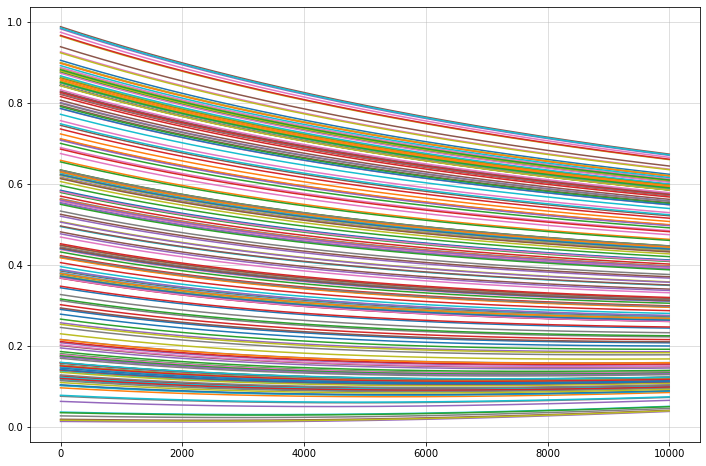

In [49]:
plt.figure(figsize = (12,8))
plt.grid(alpha = 0.5)
for i in range(0,sol1_l.shape[0]):
  plt.plot(sol1_l[i,:])
  plt.plot(sol2_l[i,:])
